## Maitri Patel

## CSC 217 - Spring 2019 - Final Project

For my project, I will examine some trends of public spending in the fields of education, health and infrastructure through exploratory analysis. This data deals with 175 countries, however, here we have neglected the countries with null data for the sake of outliers-free results. That being said, I have 118 countries and the data covers average values from the year 2006 to 2016. 
It was collected by a survey initiated by The World Bank which you can find [here](https://datacatalog.worldbank.org/dataset/efficiency-public-spending-education-health-and-infrastructure). 

Here, I will use several visuals like boxplots and a couple of other graphs which reveals how much spreaded our data is, to find if any of the developing countries appear as an outliers and a couple of other statistical measures like mean, standard deviation and variance to determine the values of trends I discover. 
Since it deals with a large number of countries and multiple variations of GDPs, private spending and public spending, even a small amount of change in the values can make a big difference in our results and analyses. Therefore, it's very necessary to study the differences and even a little variations which can bring significant changes in our assumptions.    

First I'll import the necessary packages down, along with downloading and cleaning the data.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import math
import statistics as st

In [3]:
# Defining Function
def f(x):
    return x**3 - 5*x - 9

# Defining derivative of function
def g(x):
    return 3*x**2 - 5

# Implementing Newton Raphson Method

def newtonRaphson(x0,e,N):
    print('\n\n*** NEWTON RAPHSON METHOD IMPLEMENTATION ***')
    step = 1
    flag = 1
    condition = True
    while condition:
        if g(x0) == 0.0:
            print('Divide by zero error!')
            break
        
        x1 = x0 - f(x0)/g(x0)
        print('Iteration-%d, x1 = %0.6f and f(x1) = %0.6f' % (step, x1, f(x1)))
        x0 = x1
        step = step + 1
        
        if step > N:
            flag = 0
            break
        
        condition = abs(f(x1)) > e
    
    if flag==1:
        print('\nRequired root is: %0.8f' % x1)
    else:
        print('\nNot Convergent.')


# Input Section
x0 = input('Enter Guess: ')
e = input('Tolerable Error: ')
N = input('Maximum Step: ')

# Converting x0 and e to float
x0 = float(x0)
e = float(e)

# Converting N to integer
N = int(N)


#Note: You can combine above three section like this
# x0 = float(input('Enter Guess: '))
# e = float(input('Tolerable Error: '))
# N = int(input('Maximum Step: '))

# Starting Newton Raphson Method
newtonRaphson(x0,e,N)

Enter Guess: 1
Tolerable Error: 0.0001
Maximum Step: 3


*** NEWTON RAPHSON METHOD IMPLEMENTATION ***
Iteration-1, x1 = -5.500000 and f(x1) = -147.875000
Iteration-2, x1 = -3.775510 and f(x1) = -43.940373
Iteration-3, x1 = -2.611941 and f(x1) = -13.759569

Not Convergent.


In [ ]:
df = pd.read_excel('D:/data.xlsx', sheet_name = 4, header = 0)

### CLEANING THE DATA

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

In [28]:
df2 = df.dropna()

In [29]:
df2.isnull().sum()

Country name                                                                 0
Total spending on health (% of GDP)                                          0
Public spending on Education (% of GDP)                                      0
Quality of overall infrastructure, 1-7 (best)                                0
Population (Millions Persons) [LP]                                           0
Total investment spending per capita                                         0
Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]    0
dtype: int64

In [30]:
len(df2)

118

Since we had very negligible amount of null values, we cleaned our data by eliminating all the null values. So all together, we have 118 total countries to evaluate and analyse. 

### EXPLORATORY ANALYSES

{'whiskers': [<matplotlib.lines.Line2D at 0x15d66759780>,
 'caps': [<matplotlib.lines.Line2D at 0x15d66759f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x15d667592e8>],
 'medians': [<matplotlib.lines.Line2D at 0x15d652639e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x15d652636a0>],
 'means': []}

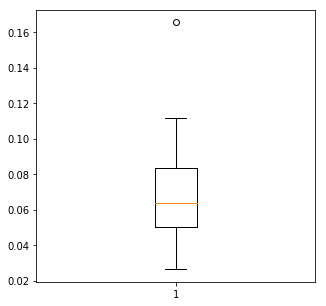

In [31]:
#Plot a Boxplot
fig = plt.figure(figsize=(5,5))
plt.boxplot(df2['Total spending on health (% of GDP)'])

In [32]:
#anything above this is an outlier
np.percentile(df2['Total spending on health (% of GDP)'], q=75) + (np.percentile(df2['Total spending on health (% of GDP)'], q=75) - np.percentile(df2['Total spending on health (% of GDP)'], q=25)) * 1.5

0.1337942125

In [33]:
a = df2.groupby('Country name')["Total spending on health (% of GDP)"].mean()
a[a == a.max()]

Country name
United States    0.165542
Name: Total spending on health (% of GDP), dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x15d666ffa58>,
 'caps': [<matplotlib.lines.Line2D at 0x15d666ffeb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x15d666ff5f8>],
 'medians': [<matplotlib.lines.Line2D at 0x15d652749b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15d65274cf8>],
 'means': []}

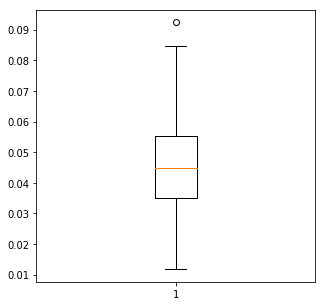

In [34]:
#Plot a Boxplot
fig = plt.figure(figsize=(5,5))
plt.boxplot(df2['Public spending on Education (% of GDP) '])

In [35]:
#anything above this for the outliers
np.percentile(df2['Public spending on Education (% of GDP) '], q=75) + (np.percentile(df2['Public spending on Education (% of GDP) '], q=75) - np.percentile(df2['Public spending on Education (% of GDP) '], q=25)) * 1.5

0.08542526249999999

In [36]:
#anything below this is an outlier
np.percentile(df2['Public spending on Education (% of GDP) '], q=25) - (np.percentile(df2['Public spending on Education (% of GDP) '], q=75) - np.percentile(df2['Public spending on Education (% of GDP) '], q=25)) * 1.5

0.004888762500000008

In [37]:
b = df2.groupby('Country name')["Public spending on Education (% of GDP) "].mean()
b[b == b.max()]

Country name
Botswana    0.092422
Name: Public spending on Education (% of GDP) , dtype: float64

(array([ 8., 13., 22., 18., 13., 15., 10.,  7.,  6.,  6.]),
 array([2.09539 , 2.552736, 3.010082, 3.467428, 3.924774, 4.38212 ,
        4.839466, 5.296812, 5.754158, 6.211504, 6.66885 ]),
 <a list of 10 Patch objects>)

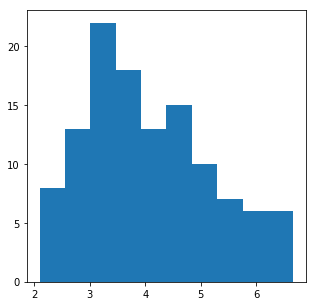

In [38]:
#Plot a histogram to see what's the most common rank under which majority of countries fall
fig = plt.figure(figsize=(5,5))
plt.hist(df2['Quality of overall infrastructure, 1-7 (best)'])

From this histogram, we can see that most countries fall under 3-4 in a quality scale of 1 to 7. So, majority of the countries have an average quality of overall infrastructure. 

In [39]:
df3 = df2[df2["Quality of overall infrastructure, 1-7 (best)"] > 6]
df3

,Country name,Total spending on health (% of GDP),Public spending on Education (% of GDP),"Quality of overall infrastructure, 1-7 (best)",Population (Millions Persons) [LP],Total investment spending per capita,"Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]"
5,Austria,0.109071,0.054905,6.31994,8435687.50,10666.020,5.490451
19,Switzerland,0.109647,0.049790,6.66885,7874363.60,17982.720,4.979023
28,Germany,0.108839,0.047184,6.28701,80927795.00,8621.967,4.718364
29,Denmark,0.107278,0.080549,6.13692,5557681.50,12024.550,8.054886
37,Finland,0.089571,0.064964,6.42468,5374937.10,10346.440,6.496452
38,France,0.110532,0.055331,6.38608,63061983.00,9507.572,5.533064
54,Iceland,0.088275,0.073712,6.22703,322137.73,8855.236,7.371169
85,Netherlands,0.102815,0.053652,6.02311,16673000.00,10170.390,5.365204


I have 8 countries out of 118 countries which have the best quality of infrastructure since they all are ranked 7 from the scale on 1-7.

{'whiskers': [<matplotlib.lines.Line2D at 0x15d66857358>,
 'caps': [<matplotlib.lines.Line2D at 0x15d66886438>,
 'boxes': [<matplotlib.lines.Line2D at 0x15d6687c9b0>],
 'medians': [<matplotlib.lines.Line2D at 0x15d66886ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x15d66886e10>],
 'means': []}

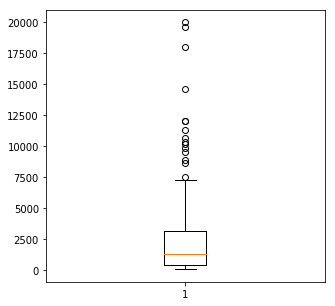

In [40]:
#Plot a Boxplot
fig = plt.figure(figsize=(5,5))
plt.boxplot(df2['Total investment spending per capita'])

In [41]:
c = df2.groupby('Country name')["Total investment spending per capita"].mean()
c[c == c.max()]

Country name
Luxembourg    19991.03
Name: Total investment spending per capita, dtype: float64

Whoa! Luxembourg spends the highest income per capita among all the countries. Neither is it's infrastructural facility notable enough, nor does it spend considerably on education and health. Wonder where the Luxembourg people like to spend their money after all!

In [42]:
df2.var()

Total spending on health (% of GDP)                                          5.726290e-04
Public spending on Education (% of GDP)                                      2.394951e-04
Quality of overall infrastructure, 1-7 (best)                                1.266145e+00
Population (Millions Persons) [LP]                                           1.429490e+16
Total investment spending per capita                                         1.733854e+07
Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]    2.636163e+00
dtype: float64

In [43]:
a = np.mean(df2['Total spending on health (% of GDP)'])
print("the mean of health spending is ", a)
b = np.median(df2['Total spending on health (% of GDP)'])
print("median of health spending is ", b)
c = np.std(df2['Total spending on health (% of GDP)'])
print("standard deviation of health spending is ", c)

the mean of health spending is  0.0669250415254237
median of health spending is  0.06375310000000001
standard deviation of health spending is  0.023828055145589236


In [44]:
a= np.mean(df2['Public spending on Education (% of GDP) '])
print("the mean on education expenditure is ", a)
b = np.median(df2['Public spending on Education (% of GDP) '])
print("the median on education expenditure is ", b)
c = np.std(df2['Public spending on Education (% of GDP) '])
print("standard deviation of education expenditure is ", c)

the mean on education expenditure is  0.04615557711864406
the median on education expenditure is  0.0448422
standard deviation of education expenditure is  0.015409915894464719


In [45]:
a = np.mean(df2['Quality of overall infrastructure, 1-7 (best)'])
print("the mean on infrastructure quality is ", a)
b = np.median(df2["Quality of overall infrastructure, 1-7 (best)"])
print("the median on infrastructure quality is ", b)
c = np.std(df2['Quality of overall infrastructure, 1-7 (best)'])
print("standard deviation of infrastructure quality is ", c)

the mean on infrastructure quality is  4.055034152542375
the median on infrastructure quality is  3.855045
standard deviation of infrastructure quality is  1.1204530327561337


### RELATIONSHIP BETWEEN TOTAL SPENDING AND SPENDING IN HEALTH, EDUCATION AND                                                                                            INFRASTRUCTURE

#### Relation between total spending and spending on infrastructure

In [159]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

In [160]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(df2["Total investment spending per capita"],
                                                                        df2["Quality of overall infrastructure, 1-7 (best)"])

Text(0.5, 0.92, 'Relationship between total spending and quality of infrastructure')

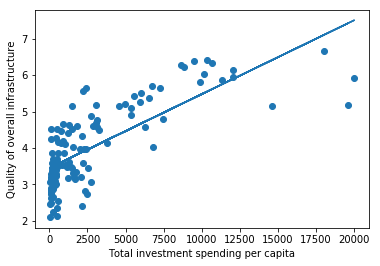

In [161]:

plt.scatter(df2["Total investment spending per capita"],
            df2["Quality of overall infrastructure, 1-7 (best)"])
sorted_order = np.argsort(df2["Total investment spending per capita"])
plt.plot(df2["Total investment spending per capita"][sorted_order], predictions[sorted_order])
plt.ylabel("Quality of overall infrastructure")
plt.xlabel("Total investment spending per capita")
fig.suptitle("Relationship between total spending and quality of infrastructure", fontsize=15, y=0.92)

In [162]:
#R-Squared Value
np.var(predictions) / np.var(df2["Quality of overall infrastructure, 1-7 (best)"])

0.5631213439835548

Text(0.5, 0.92, 'Residuals')

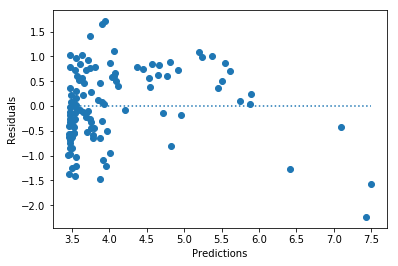

In [163]:
plt.scatter(predictions, residuals)
plt.plot([predictions.min(), predictions.max()], [0,0], linestyle='dotted')
plt.xlabel("Predictions")
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

As we can see from our graphs, my model is heteroskedastic as there is a linear pattern in the relationship between total spending and spending on infrastructure. Although the datapoints seems to be skewed to the right, the R-squared value of 56% suggests that the standard deviation of the error is around 30% of the standard deviation of the dependent variable.

#### Relation between total spending and spending on health

In [164]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(df2["Total investment spending per capita"],
                                                                        df2["Total spending on health (% of GDP)"])

Text(0.5, 0.92, 'Relationship between total spending and spending on health')

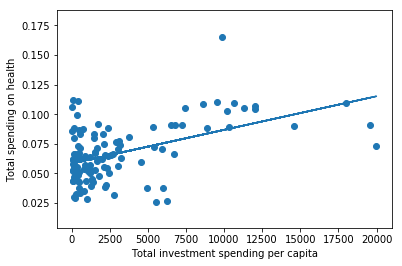

In [165]:
plt.scatter(df2["Total investment spending per capita"],
            df2["Total spending on health (% of GDP)"])
sorted_order = np.argsort(df2["Total investment spending per capita"])
plt.plot(df2["Total investment spending per capita"][sorted_order], predictions[sorted_order])
plt.ylabel("Total spending on health")
plt.xlabel("Total investment spending per capita")
fig.suptitle("Relationship between total spending and spending on health", fontsize=15, y=0.92)

In [166]:
#R-Squared Value
np.var(predictions) / np.var(df2["Total spending on health (% of GDP)"])

0.24373087942288885

Text(0.5, 0.92, 'Residuals')

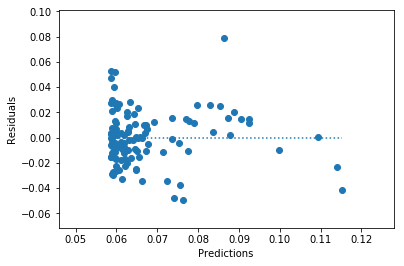

In [168]:
plt.scatter(predictions, residuals)
plt.plot([predictions.min(), predictions.max()], [0,0], linestyle='dotted')
plt.xlabel("Predictions")
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

Based on the very low R-squared value and heteroskedasticity, my predictions of the model in the public spending shows that even noisy, high-variability data has a significant trend. The trend indicates that the predictor variable still provides information about the response even though a couple of data points fall further from the regression line.

#### Relationship between total spending and spending on education

In [169]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(df2["Total investment spending per capita"],
                                                                        df2["Public spending on Education (% of GDP) "])

Text(0.5, 0.92, 'Relationship between total spending and spending on education')

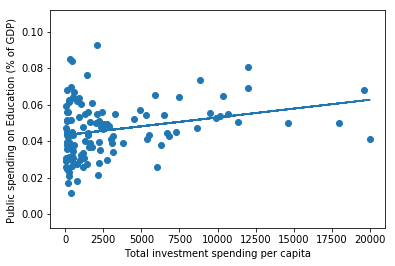

In [170]:
plt.scatter(df2["Total investment spending per capita"],
            df2["Public spending on Education (% of GDP) "])
sorted_order = np.argsort(df2["Total investment spending per capita"])
plt.plot(df2["Total investment spending per capita"][sorted_order], predictions[sorted_order])
plt.ylabel("Public spending on Education (% of GDP) ")
plt.xlabel("Total investment spending per capita")
fig.suptitle("Relationship between total spending and spending on education", fontsize=15, y=0.92)

In [171]:
#R-Squared Value
np.var(predictions) / np.var(df2["Total spending on health (% of GDP)"])

0.028483853152221652

Text(0.5, 0.92, 'Residuals')

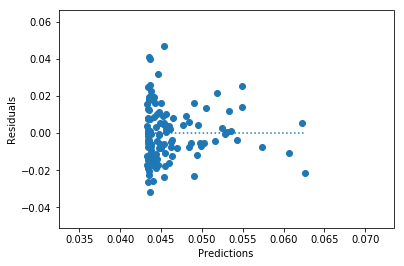

In [172]:
plt.scatter(predictions, residuals)
plt.plot([predictions.min(), predictions.max()], [0,0], linestyle='dotted')
plt.xlabel("Predictions")
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

        
                                                          SUMMARY:
VISUALIZATIONS:

As a primary means to graphically depict our dataset, boxplots has been used here. It divides our very large dataset into the quartiles which makes it easier to draw conclusions based on their quartile ranges and outliers. Note that there is one country as an outlier in health expenditure which is United States which spends the highest on health matters among all the other countries, and first quartile at 0.05 and third quartile at around 0.08. While in the case of education expenditure, we see Botswana as an outlier spending highest on education nearly 9.242205% of it's GDP. Note that results might differ with a very thin line of difference since we have neglected all the countries with the null values.The data of total investment spending is on per capita rather than % of their GDP, therefore we see many outliers in that data. But we can actually consider it wide spreaded than any other dataset. Whereas there are no outliers at all in the infrastructural quality which suggest that almost all of the above mentioned countires spend considerably similar amount of their resources for buildings and infrastructure whose interquartile range lies between 3 and 5.

DESCRIPTIVE STATISTICS:

Further, we found the mean and median of all our values and saw that mean and median values are close enough to each other which suggest that our fairly evenly distributed.The mean and median values of education expenditure is highest among health, education and infrastructure which I guess is interestingly good that countries give most importance to education than any other basic necessities.